In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
plt.style.use("default")
import warnings
warnings.filterwarnings("ignore")

[*********************100%***********************]  5 of 5 completed


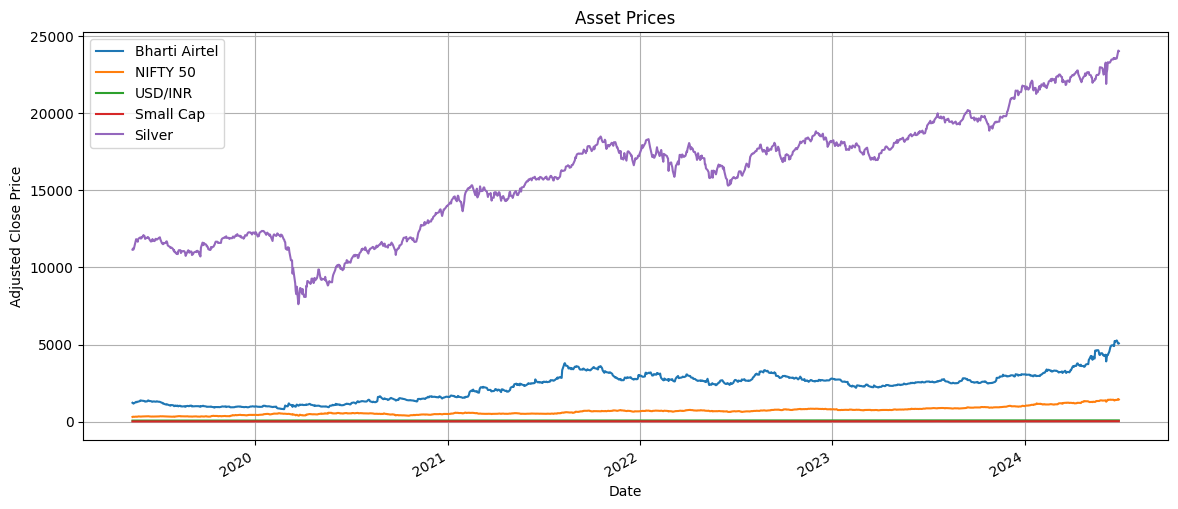

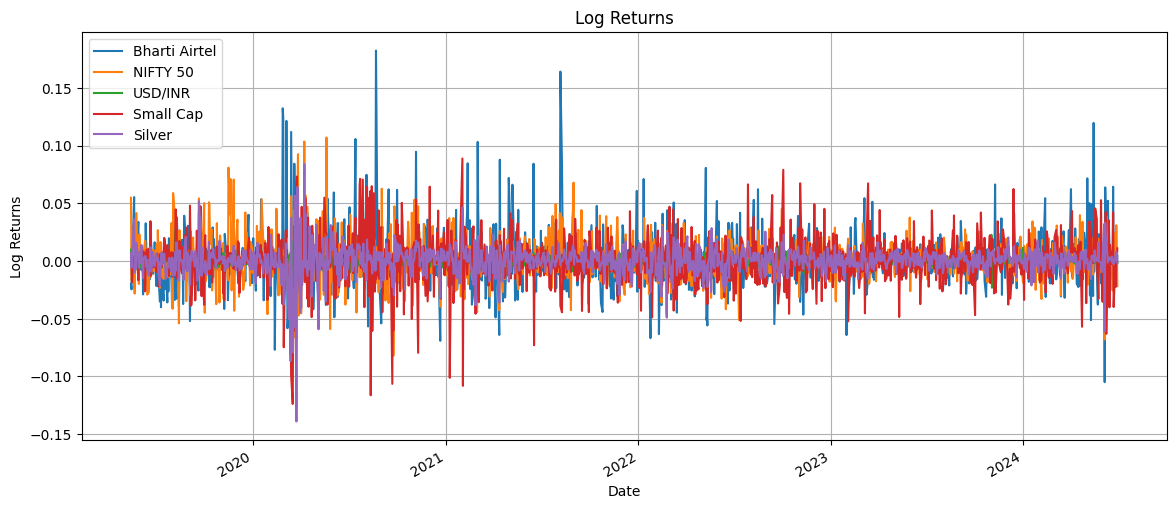

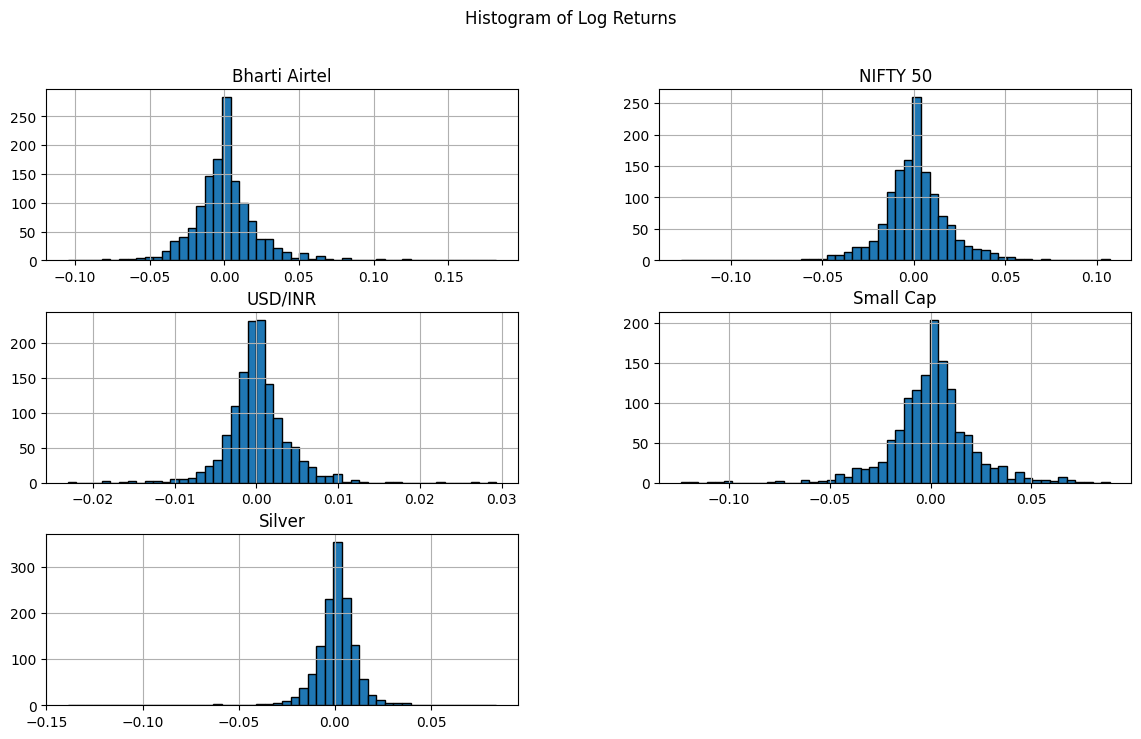

In [2]:
# Task 1 - Asset Selection & Data Download

# Define tickers
tickers = {
    "Bharti Airtel": "BHARTIARTL.NS",
    "NIFTY 50": "^NSEI",
    "USD/INR": "INR=X",
    "Small Cap": "BASF.NS",   # Replace with any relevant small-cap if needed
    "Silver": "SI=F"
}

# Define date range
start_date = "2019-05-11"
end_date = "2024-06-29"

# Download adjusted close prices
data = yf.download(list(tickers.values()), start=start_date, end=end_date, auto_adjust=False)["Adj Close"]
data.columns = tickers.keys()

# Forward fill to handle missing values
data_ffill = data.ffill().dropna()

# Calculate daily log returns
returns = np.log(data_ffill / data_ffill.shift(1)).dropna()

# Plot price history
data_ffill.plot(figsize=(14, 6), title="Asset Prices")
plt.ylabel("Adjusted Close Price")
plt.grid(True)
plt.show()

# Plot return history
returns.plot(figsize=(14, 6), title="Log Returns")
plt.ylabel("Log Returns")
plt.grid(True)
plt.show()

# Plot histograms of returns
returns.hist(bins=50, figsize=(14, 8), edgecolor='black')
plt.suptitle("Histogram of Log Returns")
plt.show()


In [3]:
# merge all the returns into a single DataFrame
returns_df = pd.DataFrame(returns)
returns_df.columns = tickers.keys()
from scipy.stats import skew, kurtosis

data = returns_df.reset_index()
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Bharti Airtel,NIFTY 50,USD/INR,Small Cap,Silver
0,2019-05-14,-0.019827,0.054802,0.009883,0.002647,0.006603
1,2019-05-15,-0.024583,-0.016022,-0.004400,0.000000,-0.005813
2,2019-05-16,0.029363,-0.018433,-0.001392,-0.018679,0.008932
3,2019-05-17,0.009612,0.009944,0.000367,-0.009089,0.013241
4,2019-05-20,0.055354,0.034855,0.000662,0.004243,0.036250
...,...,...,...,...,...,...
1336,2024-06-24,0.015362,0.002645,-0.000468,-0.002844,0.001563
1337,2024-06-25,-0.011329,-0.003422,-0.001223,-0.022358,0.007764
1338,2024-06-26,-0.019742,0.031000,-0.000549,0.002494,0.006199
1339,2024-06-27,-0.010631,0.011106,0.001986,0.000311,0.007334


In [4]:
# Task 2 : Printing the summary statistics upto 2 decimal points
for col in returns_df.columns:
    print(f"Summary statistics for {col}:")
    print(f"Mean: {returns_df[col].mean():.5f}")
    print(f"Standard Deviation: {returns_df[col].std():.2f}")
    print(f"Skewness: {skew(returns_df[col]):.2f}")
    print(f"Kurtosis: {kurtosis(returns_df[col]):.2f}")
    print("-" * 50)

Summary statistics for Bharti Airtel:
Mean: 0.00106
Standard Deviation: 0.02
Skewness: 1.44
Kurtosis: 8.62
--------------------------------------------------
Summary statistics for NIFTY 50:
Mean: 0.00115
Standard Deviation: 0.02
Skewness: 0.24
Kurtosis: 5.01
--------------------------------------------------
Summary statistics for USD/INR:
Mean: 0.00013
Standard Deviation: 0.00
Skewness: 0.51
Kurtosis: 8.08
--------------------------------------------------
Summary statistics for Small Cap:
Mean: 0.00051
Standard Deviation: 0.02
Skewness: -0.44
Kurtosis: 5.02
--------------------------------------------------
Summary statistics for Silver:
Mean: 0.00057
Standard Deviation: 0.01
Skewness: -1.66
Kurtosis: 22.38
--------------------------------------------------


In [5]:
# Task 3 - Performing Volatility estimation using Historical Volatility Method and GARCH-type models
portfolio_weights = np.array([0.2] * len(returns_df.columns))  # Equal weights for each asset
portfolio_returns = returns_df.dot(portfolio_weights)
portfolio_returns_df = pd.DataFrame(portfolio_returns, columns=["Portfolio Returns"])

# print the mean std skewness and kurtosis of the portfolio returns
print(f"Summary statistics for the portfolio:")
print(f"Mean: {portfolio_returns_df['Portfolio Returns'].mean():.5f}")
print(f"Standard Deviation: {portfolio_returns_df['Portfolio Returns'].std():.5f}")
print(f"Skewness: {skew(portfolio_returns_df['Portfolio Returns']):.2f}")
print(f"Kurtosis: {kurtosis(portfolio_returns_df['Portfolio Returns']):.2f}")
print("-" * 50)

portfolio_returns_df

Summary statistics for the portfolio:
Mean: 0.00069
Standard Deviation: 0.00925
Skewness: -0.62
Kurtosis: 7.20
--------------------------------------------------


,Portfolio Returns
Date,
2019-05-14,0.010822
2019-05-15,-0.010164
2019-05-16,-0.000042
2019-05-17,0.004815
2019-05-20,0.026273
...,...
2024-06-24,0.003251
2024-06-25,-0.006114
2024-06-26,0.003880


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8746.734, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8748.073, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8748.112, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8746.117, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-8746.119, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-8744.128, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-8754.336, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-8752.086, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-8752.303, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-8752.450, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-8754.235, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-8750.467, Time=1.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 3.152 seconds
                               SARIMAX Results                              

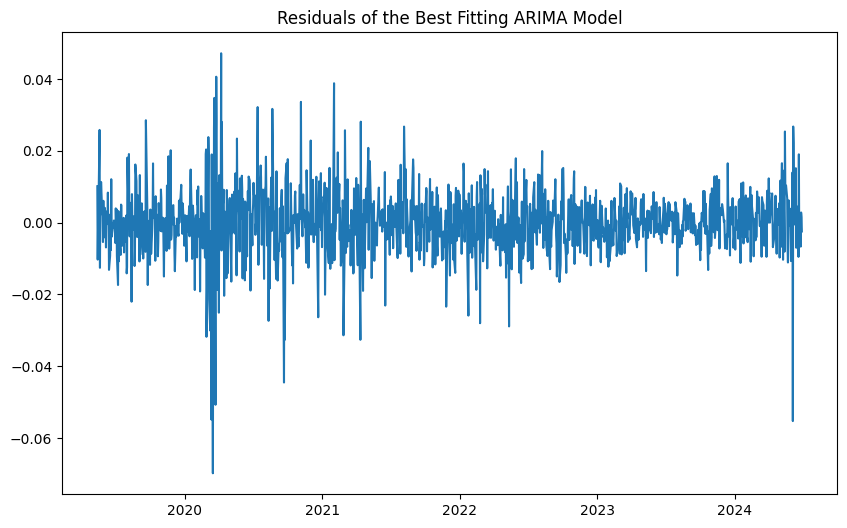

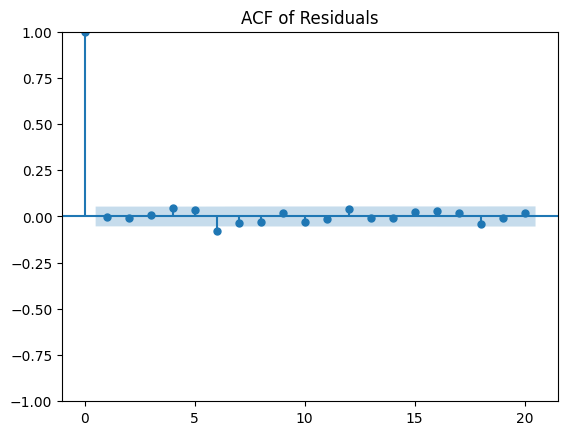

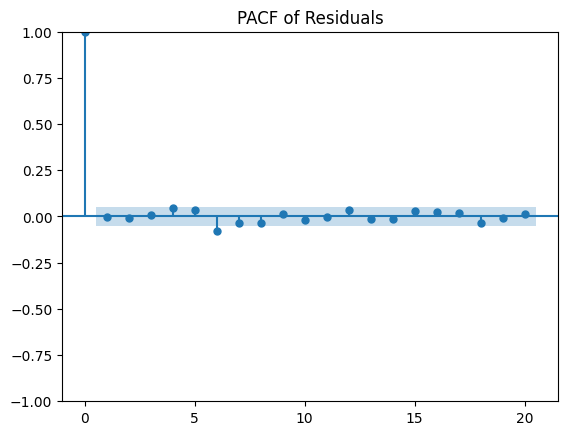

In [6]:
# Modeling the returns using ARIMA 
import pmdarima as pm

# Assuming 'data' and 'returns' are defined from the previous code
returns = portfolio_returns_df['Portfolio Returns'].dropna()

# Find best ARIMA model
arima_model = pm.auto_arima(returns, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=1,
                           start_P=0, seasonal=False,
                           d=None, D=0, trace=True,
                           error_action='ignore',  # we don't want to know if an order does not work
                           suppress_warnings=True,  # we don't want convergence warnings
                           stepwise=True)

# Print the model summary
print(arima_model.summary())

# Get the residuals
residuals = arima_model.resid()

# Analyze the residuals (e.g., plot them, check for autocorrelation)
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of the Best Fitting ARIMA Model")
plt.show()

# Further analysis on residuals (e.g., ACF, PACF plots)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(residuals, lags=20)
plt.title("ACF of Residuals")
plt.show()

plot_pacf(residuals, lags=20)
plt.title("PACF of Residuals")
plt.show()

In [7]:
# performing tests for checking for hetersoskedasticity
import statsmodels.api as sm

# Assuming 'residuals' from the ARIMA model is available
# Perform the Breusch-Pagan test for heteroskedasticity
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, exog_het=sm.add_constant(np.arange(len(residuals))))

# Print the test results
print("\nBreusch-Pagan Test for Heteroskedasticity:")
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
for label, value in zip(labels, bp_test):
    print(f"{label}: {value}")

# Interpretation
alpha = 0.05  # Significance level
if bp_test[1] < alpha:
    print("Reject the null hypothesis. Heteroskedasticity is present in the residuals.")
else:
    print("Fail to reject the null hypothesis. Heteroskedasticity is not present in the residuals.")


# Alternatively, you can use the Goldfeld-Quandt test
gq_test = sm.stats.diagnostic.het_goldfeldquandt(residuals, x=sm.add_constant(np.arange(len(residuals))))

print("\nGoldfeld-Quandt Test for Heteroskedasticity:")
print(f"F-statistic: {gq_test[0]}")
print(f"p-value: {gq_test[1]}")

if gq_test[1] < alpha:
  print("Reject the null hypothesis. Heteroskedasticity is present in the residuals.")
else:
  print("Fail to reject the null hypothesis. Heteroskedasticity is not present in the residuals.")


Breusch-Pagan Test for Heteroskedasticity:
Lagrange multiplier statistic: 23.2494835870137
p-value: 1.4228864942910576e-06
f-value: 23.62439485719366
f p-value: 1.3091825954927159e-06
Reject the null hypothesis. Heteroskedasticity is present in the residuals.

Goldfeld-Quandt Test for Heteroskedasticity:
F-statistic: 0.42526563798117833
p-value: 0.9999999999999999
Fail to reject the null hypothesis. Heteroskedasticity is not present in the residuals.


In [8]:
# Assuming 'residuals' from the ARIMA model is available
# Perform the ARCH test for conditional heteroskedasticity
arch_test = sm.stats.diagnostic.acorr_ljungbox(residuals**2, lags=[10], return_df=True) # Test on squared residuals

# Print the test results
print("\nARCH Test for Conditional Heteroskedasticity (Ljung-Box test on squared residuals):")
print(arch_test)

# Interpretation
alpha = 0.05  # Significance level
if arch_test['lb_pvalue'][10] < alpha:
    print("Reject the null hypothesis. Conditional heteroskedasticity is present in the residuals.")
else:
    print("Fail to reject the null hypothesis. Conditional heteroskedasticity is not present in the residuals.")


ARCH Test for Conditional Heteroskedasticity (Ljung-Box test on squared residuals):
       lb_stat      lb_pvalue
10  737.701486  5.035835e-152
Reject the null hypothesis. Conditional heteroskedasticity is present in the residuals.


In [9]:
import arch

# Assuming 'residuals' from the ARIMA model is available
# Fit different GARCH models
garch_models = {
    'Standard GARCH': arch.arch_model(residuals, vol='Garch', p=1, q=1),
    'EGARCH': arch.arch_model(residuals, vol='EGARCH', p=1, o=1, q=1),
    'GJR-GARCH': arch.arch_model(residuals, vol='GARCH', p=1, o=1, q=1),  # GJR is a special case of GARCH
    'APARCH': arch.arch_model(residuals, vol='APARCH', p=1, o=1, q=1),
    'FIGARCH': arch.arch_model(residuals, vol='FIGARCH', p=1, o=1, q=1)
}

results = {}
for name, model in garch_models.items():
    try:
        results[name] = model.fit(disp='off')  # Fit the model (suppress output)
        print(f"Successfully fit {name}")
    except Exception as e:
        print(f"Error fitting {name}: {e}")

# Compare AIC/BIC to find the best fitting model
best_model_name = None
best_aic = float('inf')
best_bic = float('inf')

for name, result in results.items():
    if result.aic < best_aic:
        best_aic = result.aic
        best_model_name = name
    if result.bic < best_bic:
        best_bic = result.bic
for name, result in results.items():
    print(f"{name}: AIC = {result.aic:.2f}, BIC = {result.bic:.2f}")
print(f"Best Model (by AIC): {best_model_name}")


# Get residuals from the best GARCH model
if best_model_name in results:
    best_model_result = results[best_model_name]
    best_garch_residuals = best_model_result.std_resid
else:
    print("Best model not found in results!")
    best_garch_residuals = None
    
# print(results)

Successfully fit Standard GARCH
Successfully fit EGARCH
Successfully fit GJR-GARCH
Successfully fit APARCH
Successfully fit FIGARCH
Standard GARCH: AIC = -9054.23, BIC = -9033.43
EGARCH: AIC = -9075.00, BIC = -9049.00
GJR-GARCH: AIC = -9060.72, BIC = -9034.72
APARCH: AIC = -9058.47, BIC = -9027.26
FIGARCH: AIC = -9063.39, BIC = -9037.39
Best Model (by AIC): EGARCH


WRITE DOWN THE DETAILED RESULTS HERE

In [10]:

# Assume fitted_result is your ARCHModelResult for the best model

forecast_horizon = 30
num_simulations = 1000

# 1) Run a simulation‑based forecast
fc = best_model_result.forecast(
    horizon=forecast_horizon,
    method='simulation',
    simulations=num_simulations
)

# fc.simulations is an (horizon × simulations) array of returns
simulated_returns = fc.simulations.values  # DataFrame or ndarray

# 2) Compute daily vol as the std‑dev across the simulation axis
volatility_forecast = simulated_returns.std(axis=1)
volatility_forecast = volatility_forecast.ravel()

# 3) Put into a DataFrame for easy viewing
volatility_forecast_df = pd.DataFrame({
    "Day": np.arange(1, forecast_horizon + 1),
    "Volatility Forecast": volatility_forecast
})

print("\nVolatility Forecast for the Next 30 Days:")
volatility_forecast_df.set_index("Day", inplace=True)
volatility_forecast_df


Volatility Forecast for the Next 30 Days:


,Volatility Forecast
Day,
1,0.009502
2,0.009542
3,0.009960
4,0.009608
5,0.010166
6,0.009772
7,0.010103
8,0.010203
9,0.010062


In [11]:
VaR_results = pd.DataFrame(columns=["Simulation Method","VaR_95", "VaR_99"])

In [12]:
# Task 4 - VaR Estimation using 3 methods


# HISTORICAL SIMULATION METHOD
def compute_var_bootstrap(returns, confidence_level, num_simulations=1000):
    """
    Computes Value at Risk (VaR) using the historical simulation approach with bootstrapping.

    Args:
        returns (pd.Series): A pandas Series of historical returns.
        confidence_level (float): The desired confidence level for VaR (e.g., 0.95 for 95% VaR).
        num_simulations (int): The number of bootstrap simulations to perform.

    Returns:
        tuple: A tuple containing the mean VaR, and the lower and upper bounds of the 95% confidence interval.
    """
    var_values = []
    for _ in range(num_simulations):
        # Perform bootstrapping by resampling returns with replacement
        bootstrapped_returns = np.random.choice(returns, size=len(returns), replace=True)

        # Sort the bootstrapped returns
        sorted_returns = np.sort(bootstrapped_returns)

        # Calculate the index corresponding to the desired quantile
        index = int(len(sorted_returns) * (1 - confidence_level))

        # Extract the VaR at the specified confidence level
        var = -sorted_returns[index]
        var_values.append(var)

    # Calculate the mean VaR and the 95% confidence interval
    mean_var = np.mean(var_values)
    lower_bound = np.percentile(var_values, 2.5)
    upper_bound = np.percentile(var_values, 97.5)

    return mean_var, lower_bound, upper_bound

# Compute VaR at 95% and 99% confidence levels
var_95_mean, var_95_lower, var_95_upper = compute_var_bootstrap(returns, 0.95)
var_99_mean, var_99_lower, var_99_upper = compute_var_bootstrap(returns, 0.99)


print(f"95% VaR (Mean): {var_95_mean:.4f}")
# print(f"95% VaR Confidence Interval: ({var_95_lower:.4f}, {var_95_upper:.4f})")
print(f"99% VaR (Mean): {var_99_mean:.4f}")
# print(f"99% VaR Confidence Interval: ({var_99_lower:.4f}, {var_99_upper:.4f})")
VaR_results = pd.concat([VaR_results, pd.DataFrame([{"Simulation Method": "Historical Simulation", "VaR_95": var_95_mean, "VaR_99": var_99_mean}])], ignore_index=True)


95% VaR (Mean): 0.0122
99% VaR (Mean): 0.0263


In [13]:
# USING VARIANCE-COVARIANCE VAR METHOD

from scipy import stats

def parametric_var(returns, confidence_level, lookback_period=252):
    """
    Computes Parametric Value at Risk (VaR) using the variance-covariance method.

    Args:
        returns (pd.Series): A pandas Series of historical returns.
        confidence_level (float): The desired confidence level for VaR (e.g., 0.95 for 95% VaR).
        lookback_period (int): The number of past returns to use for estimation.

    Returns:
        float: The calculated VaR value.
    """
    # Calculate the mean and standard deviation of returns over the lookback period.
    mean_return = returns.tail(lookback_period).mean()
    std_dev_return = returns.tail(lookback_period).std()

    # Calculate the z-score corresponding to the confidence level.
    z_score = np.abs(stats.norm.ppf(1 - confidence_level))

    # Calculate VaR using the formula: VaR = mean_return - z_score * std_dev_return
    var = -(mean_return - z_score * std_dev_return)

    return var

# Example usage with your existing returns data:
# Assuming 'returns' is a pandas Series of your daily returns
confidence_level = 0.95  # 95% confidence level
var_95 = parametric_var(returns, confidence_level)
print(f"{confidence_level*100:.0f}% Parametric VaR: {var_95:.4f}")
# For 99% confidence level
confidence_level = 0.99
var_99 = parametric_var(returns, confidence_level)
print(f"{confidence_level*100:.0f}% Parametric VaR: {var_99:.4f}")
VaR_results = pd.concat([VaR_results, pd.DataFrame([{"Simulation Method": "Variance-Covariance Simulation", "VaR_95": var_95, "VaR_99": var_99}])], ignore_index=True)


95% Parametric VaR: 0.0110
99% Parametric VaR: 0.0161


In [14]:
# MONTE - CARLO SIMULATIONS METHOD

# find the best fitting distribution
import scipy.stats as st
from scipy.stats import genextreme as gev, genpareto as gpd

def fit_distributions(returns, distributions):
    """
    Fits various statistical distributions to the provided returns data
    and evaluates the goodness of fit.

    Args:
        returns: A pandas Series or numpy array of returns data.
        distributions: A list of distribution names to fit.

    Returns:
        A dictionary containing fitted distributions and their AIC/BIC scores.
    """
    results = {}
    for distribution_name in distributions:
        try:
            distribution = getattr(st, distribution_name)
            params = distribution.fit(returns)
            results[distribution_name] = {
                'distribution': distribution,
                'params': params,
                'AIC': distribution.nnlf(params, returns) + 2 * len(params),  # AIC
                'BIC': distribution.nnlf(params, returns) + len(params) * np.log(len(returns))  # BIC
            }
        except Exception as e:
            print(f"Error fitting {distribution_name}: {e}")
            continue

    return results

def compare_distributions(results):
    """
    Compares fitted distributions based on AIC/BIC scores.

    Args:
        results: A dictionary of fitted distributions with AIC/BIC scores.

    Returns:
        The name of the best fitting distribution.
    """

    best_distribution = None
    best_aic = float('inf')
    best_bic = float('inf')  # Initialize best_bic to infinity
    for name, result in results.items():
        if result['AIC'] < best_aic:
            best_aic = result['AIC']
            best_distribution = name
        if result['BIC'] < best_bic:  # Compare BIC as well
            best_bic = result['BIC']

    print(f"\nComparison of Distribution Fits:")
    for name, result in results.items():
        print(f"{name}: AIC = {result['AIC']:.2f}, BIC = {result['BIC']:.2f}")  # Print both AIC and BIC
    print(f"Best Distribution by AIC: {best_distribution}")  # Explicitly print by AIC

    # Return AIC and BIC of the best distribution for clarity
    return best_distribution, results[best_distribution]['AIC'], results[best_distribution]['BIC']

# Step 2: Define Distributions to Fit
distributions = [
    'norm', 't', 'cauchy', 'laplace', 'logistic',
    'gumbel_r', 'gumbel_l', 'hypsecant', 'gennorm', 'skewnorm',
    'johnsonsu', 'johnsonsb'
]
distributions.extend(['genextreme', 'genpareto'])  # Add GEV and GPD

# Fit distributions
fitted_distributions = fit_distributions(returns, distributions)
best_dist, best_aic, best_bic = compare_distributions(fitted_distributions)

print(f"\nBest Distribution (AIC): {best_dist}, AIC={best_aic:.2f}, BIC={best_bic:.2f}") # Displaying the best distribution


Comparison of Distribution Fits:
norm: AIC = -4374.04, BIC = -4363.64
t: AIC = -4513.93, BIC = -4498.33
cauchy: AIC = -4393.04, BIC = -4382.63
laplace: AIC = -4503.63, BIC = -4493.22
logistic: AIC = -4486.47, BIC = -4476.06
gumbel_r: AIC = -3892.14, BIC = -3881.74
gumbel_l: AIC = -4167.64, BIC = -4157.24
hypsecant: AIC = -4502.01, BIC = -4491.60
gennorm: AIC = -4501.68, BIC = -4486.07
skewnorm: AIC = -4385.00, BIC = -4369.40
johnsonsu: AIC = -4511.12, BIC = -4490.32
johnsonsb: AIC = -4369.85, BIC = -4349.04
genextreme: AIC = -2309.91, BIC = -2294.30
genpareto: AIC = -2846.32, BIC = -2830.72
Best Distribution by AIC: t

Best Distribution (AIC): t, AIC=-4513.93, BIC=-4498.33


In [15]:
import numpy as np
from scipy.stats import t

def monte_carlo_var(returns, confidence_level, num_simulations=10000, best_dist='t', dist_params=None):
    """
    Computes Value at Risk (VaR) using Monte Carlo simulation.
    """
    if best_dist == 't':
        if dist_params is None:
            raise ValueError("Distribution parameters are required for t-distribution")
        df, loc, scale = dist_params  # Extract t-distribution parameters
        simulated_returns = t.rvs(df, loc=loc, scale=scale, size=num_simulations)
    else:
        raise ValueError("Unsupported distribution")

    var = -np.percentile(simulated_returns, 100 * (1 - confidence_level))
    return var

# Example: Access parameters for the t-distribution (replace 't' with your best_dist if different)
if 't' in fitted_distributions:
  t_params = fitted_distributions['t']['params']
  var_95 = monte_carlo_var(returns, 0.95, best_dist='t', dist_params=t_params)
  var_99 = monte_carlo_var(returns, 0.99, best_dist='t', dist_params=t_params)
  print(f"95% VaR (Monte Carlo, t-distribution): {var_95:.4f}")
  print(f"99% VaR (Monte Carlo, t-distribution): {var_99:.4f}")
else:
  print("t distribution not found in fitted distributions")

VaR_results = pd.concat([VaR_results, pd.DataFrame([{"Simulation Method": "Monte-Carlo Simulation", "VaR_95": var_95, "VaR_99": var_99}])], ignore_index=True)

95% VaR (Monte Carlo, t-distribution): 0.0132
99% VaR (Monte Carlo, t-distribution): 0.0223


In [16]:
VaR_results

,Simulation Method,VaR_95,VaR_99
0,Historical Simulation,0.012240,0.026266
1,Variance-Covariance Simulation,0.011044,0.016144
2,Monte-Carlo Simulation,0.013198,0.022286


In [17]:
# Task 5 - Backtesting and Model Validation

from scipy.stats import t, norm, chi2
from statsmodels.stats.diagnostic import acorr_ljungbox

def kupiec_test(violations: int, total_obs: int, p_exceed: float) -> float:
    """
    Kupiec POF test (proportion of failures).
    
    violations   = number of observed exceptions (x)
    total_obs    = number of VaR forecasts (T)
    p_exceed     = expected exception probability (e.g. 0.05 for 95% VaR)
    
    Returns the p‑value of LR = -2[ log L0 – log L1 ] ~ χ²(1).
    """
    x, T = violations, total_obs
    # avoid log(0) by handling edge cases
    term1 = x * np.log(p_exceed / (x / T))             if x > 0 else 0
    term2 = (T - x) * np.log((1 - p_exceed) / ((T - x) / T)) if T - x > 0 else 0
    LR = -2 * (term1 + term2)
    p_value = 1 - chi2.cdf(LR, df=1)
    return round(p_value, 5)


def christoffersen_test(actual_violations, alpha=0.05):
    """
    Christoffersen test for VaR model accuracy.  Checks for independence of violations.

    Args:
        actual_violations: A series of 1s (violations) and 0s (no violations)
        alpha: Significance level.

    Returns:
        p_value: p-value of the test.
    """

    # Convert violations to binary indicators (0 or 1)
    # Assuming actual_violations already contains 0s and 1s


    # Calculate the number of violations
    num_violations = actual_violations.sum()

    # Perform Ljung-Box test on indicator series
    test_result = acorr_ljungbox(actual_violations, lags=1, return_df=True)  # Lag of 1 is sufficient for this test
    p_value = test_result['lb_pvalue'][1]
    return p_value

# calculate the number of violations 
violations = (portfolio_returns_df['Portfolio Returns'] < -var_95).astype(int)  # Assuming var_95 is the VaR threshold
violations_ind = violations.astype(int)  # Convert violations to integers for statistical tests
print('Total number of violations:', violations.sum()) 

# Kupiec POF test
p_val_k = kupiec_test(violations.sum(), len(violations), 0.05)
print(f"Kupiec Test p‑value: {p_val_k}")

# Christoffersen test
p_val_c = christoffersen_test(violations_ind)
print(f"Christoffersen Test p-value: {p_val_c.round(5)}")


Total number of violations: 56
Kupiec Test p‑value: 0.15464
Christoffersen Test p-value: 0.06921


In [18]:
import statsmodels.api as sm
import numpy as np

# Assuming 'residuals' from the ARIMA model is available
# Perform the ARCH test for conditional heteroskedasticity
arch_test = sm.stats.diagnostic.acorr_ljungbox(residuals**2, lags=[10], return_df=True) # Test on squared residuals

# Print the test results
print("\nARCH Test for Conditional Heteroskedasticity (Ljung-Box test on squared residuals):")
print(arch_test)

# Interpretation
alpha = 0.05  # Significance level
if arch_test['lb_pvalue'][10] < alpha:
    print("Reject the null hypothesis. Conditional heteroskedasticity is present in the residuals.")
else:
    print("Fail to reject the null hypothesis. Conditional heteroskedasticity is not present in the residuals.")


ARCH Test for Conditional Heteroskedasticity (Ljung-Box test on squared residuals):
       lb_stat      lb_pvalue
10  737.701486  5.035835e-152
Reject the null hypothesis. Conditional heteroskedasticity is present in the residuals.
